# Vibe Coding: Real-World Data Cleaning Challenge

## The Mission

You're a Data Analyst at **TechSalary Insights**. Your manager needs answers to critical business questions, but the data is messy. Your job is to clean it and provide accurate insights.

**The catch:** You must figure out how to clean the data yourself. No step by step hints just you, your AI assistant, and real world messy data.

---

## The Dataset: Ask A Manager Salary Survey 2021

**Location:** `../Week-02-Pandas-Part-2-and-DS-Overview/data/Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.tsv`

This is **real survey data** from Ask A Manager's 2021 salary survey with over 28,000 responses from working professionals. The data comes from this survey: https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html

**Why this dataset is perfect for vibe coding:**
- Real human responses (inconsistent formatting)
- Multiple currencies and formats  
- Messy job titles and location data
- Missing and invalid entries
- Requires business judgment calls

---

## Your Business Questions

Answer these **exact questions** with clean data. There's only one correct answer for each:

### Core Questions (Required):
1. **What is the median salary for Software Engineers in the United States?** 
2. **Which US state has the highest average salary for tech workers?**
3. **How much does salary increase on average for each year of experience in tech?**
4. **Which industry (besides tech) has the highest median salary?**

### Bonus Questions (If time permits):
5. **What's the salary gap between men and women in tech roles?**
6. **Do people with Master's degrees earn significantly more than those with Bachelor's degrees?**

**Success Criteria:** Your final answers will be compared against the "official" results. Data cleaning approaches can vary, but final numbers should be within 5% of expected values.


---
# Your Work Starts Here

## Step 0: Create Your Plan
**Before writing any code, use Cursor to create your todo plan. Then paste it here:**

## My Data Cleaning Plan

### Data Cleaning Strategy:
- [x] Load and explore the dataset structure
- [ ] Clean salary data: Convert to numeric, handle different formats, filter USD only
- [ ] Standardize and clean location data (US states)
- [ ] Identify tech workers by job titles and industry
- [ ] Clean experience data (handle ranges and text)
- [ ] Clean education and gender data for bonus questions

### Analysis Tasks:
- [ ] Q1: Calculate median salary for Software Engineers in US
- [ ] Q2: Find highest paying US state for tech workers
- [ ] Q3: Calculate salary increase per year of experience in tech
- [ ] Q4: Find highest paying non-tech industry
- [ ] Q5: Calculate gender salary gap in tech roles
- [ ] Q6: Compare Master's vs Bachelor's degree salaries

### Success Criteria:
- All salaries in USD
- Valid US states only
- Reasonable salary ranges (e.g., $20k-$500k)
- Consistent categorization of tech roles
- Within 5% of expected values


## Step 1: Data Loading and Exploration

Start here! Load the dataset and get familiar with what you're working with.


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Step 2: Data Cleaning


In [6]:
# Load the Ask A Manager Salary Survey data
df = pd.read_csv('Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.tsv', sep='\t')

print(f"Dataset shape: {df.shape}")
print(f"Total records: {df.shape[0]:,}")
print(f"Total columns: {df.shape[1]}")
print("\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

Dataset shape: (28062, 18)
Total records: 28,062
Total columns: 18

Column names:
 1. Timestamp
 2. How old are you?
 3. What industry do you work in?
 4. Job title
 5. If your job title needs additional context, please clarify here:
 6. What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)
 7. How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.
 8. Please indicate the currency
 9. If "Other," please indicate the currency here: 
10. If your income needs additional context, please provide it here:
11. What country do you work in?
12. If you're in the U.S., what state do you work in?
13. What city do you work in?
14. How many years of professional work experience do you have over

## Step 3: Business Questions Analysis

Now answer those important business questions!


In [7]:
# Examine data types and basic info
print("Data types:")
print(df.dtypes)
print("\n" + "="*80)
print("First few rows:")
df.head()

Data types:
Timestamp                                                                                                                                                                                                                                object
How old are you?                                                                                                                                                                                                                         object
What industry do you work in?                                                                                                                                                                                                            object
Job title                                                                                                                                                                                                                                object
If your job title needs addi

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [8]:
# Quick overview of missing values and data quality
print("Missing values per column:")
missing_counts = df.isnull().sum()
missing_pct = (missing_counts / len(df) * 100).round(2)
missing_info = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_pct
}).sort_values('Missing Count', ascending=False)
print(missing_info[missing_info['Missing Count'] > 0])

Missing values per column:
                                                    Missing Count  Missing %
If "Other," please indicate the currency here:              27856      99.27
If your income needs additional context, please...          25020      89.16
If your job title needs additional context, ple...          20800      74.12
How much additional monetary compensation do yo...           7296      26.00
If you're in the U.S., what state do you work in?            5023      17.90
What is your highest level of education completed?            222       0.79
What is your race? (Choose all that apply.)                   177       0.63
What is your gender?                                          171       0.61
What city do you work in?                                      82       0.29
What industry do you work in?                                  74       0.26
Job title                                                       1       0.00


In [9]:
# Create simpler column names for easier analysis
column_mapping = {
    'How old are you?': 'age',
    'What industry do you work in?': 'industry',
    'Job title': 'job_title',
    'If your job title needs additional context, please clarify here:': 'job_context',
    'What is your annual salary? (You\'ll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)': 'salary',
    'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.': 'additional_compensation',
    'Please indicate the currency': 'currency',
    'If "Other," please indicate the currency here: ': 'other_currency',
    'If your income needs additional context, please provide it here:': 'income_context',
    'What country do you work in?': 'country',
    'If you\'re in the U.S., what state do you work in?': 'state',
    'What city do you work in?': 'city',
    'How many years of professional work experience do you have overall?': 'total_experience',
    'How many years of professional work experience do you have in your field?': 'field_experience',
    'What is your highest level of education completed?': 'education',
    'What is your gender?': 'gender',
    'What is your race? (Choose all that apply.)': 'race'
}

# Rename columns
df = df.rename(columns=column_mapping)
print("Simplified column names:")
print(list(df.columns))

print("\n" + "="*80)
print("Examining salary data quality...")
print(f"Salary column dtype: {df['salary'].dtype}")
print(f"Sample salary values:")
print(df['salary'].head(20))

Simplified column names:
['Timestamp', 'age', 'industry', 'job_title', 'job_context', 'salary', 'additional_compensation', 'currency', 'other_currency', 'income_context', 'country', 'state', 'city', 'total_experience', 'field_experience', 'education', 'gender', 'race']

Examining salary data quality...
Salary column dtype: object
Sample salary values:
0      55,000
1      54,600
2      34,000
3      62,000
4      60,000
5      62,000
6      33,000
7      50,000
8     112,000
9      45,000
10     47,500
11     62,000
12    100,000
13     52,000
14     32,000
15     24,000
16     85,000
17     59,000
18     98,000
19     54,000
Name: salary, dtype: object


In [10]:
# DATA CLEANING STEP 1: Clean salary data
# Convert salary to numeric, handling various formats

def clean_salary(salary_str):
    """Convert salary string to numeric, removing commas, dollar signs, etc."""
    if pd.isna(salary_str):
        return np.nan
    
    # Convert to string and clean
    salary_str = str(salary_str).strip()
    
    # Remove common non-numeric characters
    salary_str = salary_str.replace('$', '').replace(',', '').replace(' ', '')
    
    # Try to convert to float
    try:
        return float(salary_str)
    except:
        return np.nan

# Apply cleaning function
df['salary_clean'] = df['salary'].apply(clean_salary)

print("Salary cleaning results:")
print(f"Original non-null count: {df['salary'].notna().sum()}")
print(f"Cleaned non-null count: {df['salary_clean'].notna().sum()}")
print(f"Successfully converted: {df['salary_clean'].notna().sum() / df['salary'].notna().sum() * 100:.1f}%")
print(f"\nSalary statistics (before filtering):")
print(df['salary_clean'].describe())


Salary cleaning results:
Original non-null count: 28062
Cleaned non-null count: 28062
Successfully converted: 100.0%

Salary statistics (before filtering):
count    2.806200e+04
mean     3.614244e+05
std      3.622275e+07
min      0.000000e+00
25%      5.400000e+04
50%      7.500000e+04
75%      1.100000e+05
max      6.000070e+09
Name: salary_clean, dtype: float64


In [11]:
# DATA CLEANING STEP 2: Filter for USD currency only
print("Currency distribution:")
print(df['currency'].value_counts())
print(f"\nTotal responses: {len(df)}")

# Filter for USD only
df_usd = df[df['currency'] == 'USD'].copy()
print(f"USD responses: {len(df_usd)} ({len(df_usd)/len(df)*100:.1f}%)")

# Apply reasonable salary range filter (20k to 500k USD)
df_usd = df_usd[(df_usd['salary_clean'] >= 20000) & (df_usd['salary_clean'] <= 500000)]
print(f"After salary range filter (20k-500k): {len(df_usd)}")

print(f"\nCleaned salary statistics:")
print(df_usd['salary_clean'].describe())


Currency distribution:
currency
USD        23374
CAD         1673
GBP         1591
EUR          643
AUD/NZD      504
Other        160
CHF           37
SEK           37
JPY           23
ZAR           16
HKD            4
Name: count, dtype: int64

Total responses: 28062
USD responses: 23374 (83.3%)
After salary range filter (20k-500k): 23115

Cleaned salary statistics:
count     23115.000000
mean      90804.763617
std       49224.470988
min       20000.000000
25%       57000.000000
50%       79000.000000
75%      112000.000000
max      500000.000000
Name: salary_clean, dtype: float64


In [12]:
# DATA CLEANING STEP 3: Filter for US data
print("Country distribution:")
print(df_usd['country'].value_counts().head(10))

# Filter for US only
df_us = df_usd[df_usd['country'].str.contains('United States', case=False, na=False) | 
                df_usd['country'].str.contains('USA', case=False, na=False) |
                df_usd['country'].str.contains('^US$', case=False, na=False, regex=True)].copy()

print(f"\nUS responses: {len(df_us)}")
print(f"\nStates with responses: {df_us['state'].nunique()}")
print(f"Missing state data: {df_us['state'].isna().sum()}")


Country distribution:
country
United States               8912
USA                         7842
US                          2580
United States                663
U.S.                         574
USA                          461
Usa                          441
United States of America     425
United states                205
usa                          176
Name: count, dtype: int64

US responses: 22093

States with responses: 128
Missing state data: 162


In [13]:
# DATA CLEANING STEP 4: Identify tech workers
# Tech workers can be identified by job title OR industry

# Tech-related job titles
tech_job_keywords = [
    'software', 'developer', 'engineer', 'programmer', 'data scientist', 
    'data engineer', 'machine learning', 'devops', 'sysadmin', 'system administrator',
    'web developer', 'frontend', 'backend', 'full stack', 'fullstack',
    'it ', 'technical', 'technology', 'qa', 'quality assurance', 
    'network', 'database', 'cloud', 'security', 'cybersecurity',
    'product manager', 'project manager', 'scrum', 'agile'
]

# Tech-related industries
tech_industry_keywords = [
    'computing', 'software', 'technology', 'tech', 'internet', 'it ',
    'computer', 'data', 'engineering', 'telecommunications'
]

# Create is_tech flag based on job title
df_us['is_tech_job'] = df_us['job_title'].str.lower().str.contains('|'.join(tech_job_keywords), na=False, regex=True)

# Create is_tech flag based on industry
df_us['is_tech_industry'] = df_us['industry'].str.lower().str.contains('|'.join(tech_industry_keywords), na=False, regex=True)

# Combine: tech worker if either job title OR industry indicates tech
df_us['is_tech'] = df_us['is_tech_job'] | df_us['is_tech_industry']

print(f"Tech workers identified: {df_us['is_tech'].sum()} ({df_us['is_tech'].sum()/len(df_us)*100:.1f}%)")
print(f"  - By job title: {df_us['is_tech_job'].sum()}")
print(f"  - By industry: {df_us['is_tech_industry'].sum()}")
print(f"\nNon-tech workers: {(~df_us['is_tech']).sum()}")

# Show sample of tech workers
print("\nSample tech job titles:")
print(df_us[df_us['is_tech']]['job_title'].value_counts().head(15))


Tech workers identified: 6464 (29.3%)
  - By job title: 3982
  - By industry: 5378

Non-tech workers: 15629

Sample tech job titles:
job_title
Software Engineer           220
Project Manager             178
Senior Software Engineer    159
Product Manager              96
Engineering Manager          65
Software Developer           52
Data Scientist               42
Program Manager              39
Software engineer            36
Technical Writer             34
Senior Project Manager       34
Data Analyst                 33
Staff Software Engineer      31
Project Engineer             30
Senior Engineer              30
Name: count, dtype: int64


In [14]:
# DATA CLEANING STEP 5: Clean experience data
print("Experience field values:")
print(df_us['field_experience'].value_counts())

# Function to convert experience ranges to numeric
def clean_experience(exp_str):
    """Convert experience string to numeric years"""
    if pd.isna(exp_str):
        return np.nan
    
    exp_str = str(exp_str).strip().lower()
    
    # Handle ranges by taking midpoint
    if exp_str == '1 year or less':
        return 0.5
    elif exp_str == '2 - 4 years':
        return 3
    elif exp_str == '5-7 years':
        return 6
    elif exp_str == '8 - 10 years':
        return 9
    elif exp_str == '11 - 20 years':
        return 15.5
    elif exp_str == '21 - 30 years':
        return 25.5
    elif exp_str == '31 - 40 years':
        return 35.5
    elif exp_str == '41 years or more':
        return 41
    else:
        # Try to extract number
        import re
        nums = re.findall(r'\d+', exp_str)
        if nums:
            return float(nums[0])
        return np.nan

# Apply to field experience
df_us['experience_years'] = df_us['field_experience'].apply(clean_experience)

print(f"\nExperience cleaning results:")
print(f"Original non-null: {df_us['field_experience'].notna().sum()}")
print(f"Cleaned non-null: {df_us['experience_years'].notna().sum()}")
print(f"\nExperience statistics:")
print(df_us['experience_years'].describe())


Experience field values:
field_experience
11 - 20 years       5235
5-7 years           5178
2 - 4 years         4747
8 - 10 years        3995
21 - 30 years       1497
1 year or less      1097
31 - 40 years        314
41 years or more      30
Name: count, dtype: int64

Experience cleaning results:
Original non-null: 22093
Cleaned non-null: 22093

Experience statistics:
count    22093.000000
mean         9.663943
std          7.267978
min          0.500000
25%          3.000000
50%          9.000000
75%         15.500000
max         41.000000
Name: experience_years, dtype: float64


## Step 3: Answering Business Questions

Now that the data is cleaned, let's answer the core business questions!


In [15]:
# QUESTION 1: What is the median salary for Software Engineers in the United States?

# Identify Software Engineers
software_eng_keywords = ['software engineer', 'software developer', 'swe ']
df_us['is_software_engineer'] = df_us['job_title'].str.lower().str.contains('|'.join(software_eng_keywords), na=False, regex=True)

# Filter for Software Engineers in US
software_engineers = df_us[df_us['is_software_engineer']].copy()

print(f"Software Engineers identified: {len(software_engineers)}")
print(f"\nTop Software Engineer job titles:")
print(software_engineers['job_title'].value_counts().head(10))

# Calculate median salary
median_salary_swe = software_engineers['salary_clean'].median()

print(f"\n{'='*80}")
print(f"ANSWER TO QUESTION 1:")
print(f"Median salary for Software Engineers in US: ${median_salary_swe:,.2f}")
print(f"{'='*80}")

# Additional statistics
print(f"\nAdditional statistics for Software Engineers:")
print(f"Mean salary: ${software_engineers['salary_clean'].mean():,.2f}")
print(f"25th percentile: ${software_engineers['salary_clean'].quantile(0.25):,.2f}")
print(f"75th percentile: ${software_engineers['salary_clean'].quantile(0.75):,.2f}")
print(f"Min salary: ${software_engineers['salary_clean'].min():,.2f}")
print(f"Max salary: ${software_engineers['salary_clean'].max():,.2f}")


Software Engineers identified: 870

Top Software Engineer job titles:
job_title
Software Engineer              220
Senior Software Engineer       159
Software Developer              52
Software engineer               36
Staff Software Engineer         31
Software Engineer II            29
Principal Software Engineer     25
Senior software engineer        18
Senior Software Developer       17
Lead Software Engineer          15
Name: count, dtype: int64

ANSWER TO QUESTION 1:
Median salary for Software Engineers in US: $141,000.00

Additional statistics for Software Engineers:
Mean salary: $146,387.45
25th percentile: $112,230.00
75th percentile: $172,375.00
Min salary: $28,800.00
Max salary: $500,000.00


In [16]:
# QUESTION 2: Which US state has the highest average salary for tech workers?

# Filter for tech workers with valid state data
tech_workers = df_us[df_us['is_tech'] & df_us['state'].notna()].copy()

print(f"Tech workers with state data: {len(tech_workers)}")

# Calculate average salary by state
state_avg_salary = tech_workers.groupby('state')['salary_clean'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)

# Filter states with at least 10 responses for reliability
state_avg_salary_filtered = state_avg_salary[state_avg_salary['count'] >= 10]

print(f"\nTop 15 states by average tech salary (min 10 responses):")
print(state_avg_salary_filtered.head(15))

highest_paying_state = state_avg_salary_filtered.index[0]
highest_avg_salary = state_avg_salary_filtered.iloc[0]['mean']

print(f"\n{'='*80}")
print(f"ANSWER TO QUESTION 2:")
print(f"Highest paying US state for tech workers: {highest_paying_state}")
print(f"Average salary: ${highest_avg_salary:,.2f}")
print(f"Number of tech workers in {highest_paying_state}: {int(state_avg_salary_filtered.iloc[0]['count'])}")
print(f"{'='*80}")


Tech workers with state data: 6425

Top 15 states by average tech salary (min 10 responses):
                               mean    median  count
state                                               
California            142540.656780  135000.0    944
New York              132649.545825  125000.0    491
Washington            131968.642127  125000.0    489
District of Columbia  124396.597938  122000.0     97
New Mexico            120286.608696  117500.0     23
Massachusetts         119712.995918  114350.0    490
Oregon                113426.205882  100000.0    238
Virginia              113105.352381  105000.0    210
Maryland              113048.085470  103000.0    117
Colorado              110922.096234  104000.0    239
Connecticut           108187.384615  100000.0     52
Delaware              107990.900000  106750.0     10
New Jersey            107744.989474   93500.0     95
Illinois              107325.803987  100000.0    301
Georgia               107094.903704   96000.0    135

ANSWE

Tech workers with experience data: 6464

Linear Regression Results:
Slope (salary increase per year): $2,369.84
Intercept (starting salary): $90,827.44
R-squared: 0.1047
P-value: 0.000000

Average salary by experience level:
                           mean    median  count
experience_years                                
(0, 3]             90604.859689   83500.0   1739
(3, 6]            106482.211538   98000.0   1456
(6, 9]            121466.321860  112000.0   1075
(9, 15]                     NaN       NaN      0
(15, 25]          130857.511796  125000.0   1526
(25, 40]          140263.590106  135000.0    566

ANSWER TO QUESTION 3:
Salary increases by approximately $2,369.84 per year of experience in tech

Linear Regression Results:
Slope (salary increase per year): $2,369.84
Intercept (starting salary): $90,827.44
R-squared: 0.1047
P-value: 0.000000

Average salary by experience level:
                           mean    median  count
experience_years                                
(0

C:\Users\delom\AppData\Local\Temp\ipykernel_15588\3068184586.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp_group_stats = tech_with_exp_clean.groupby(exp_bins)['salary_clean'].agg(['mean', 'median', 'count'])


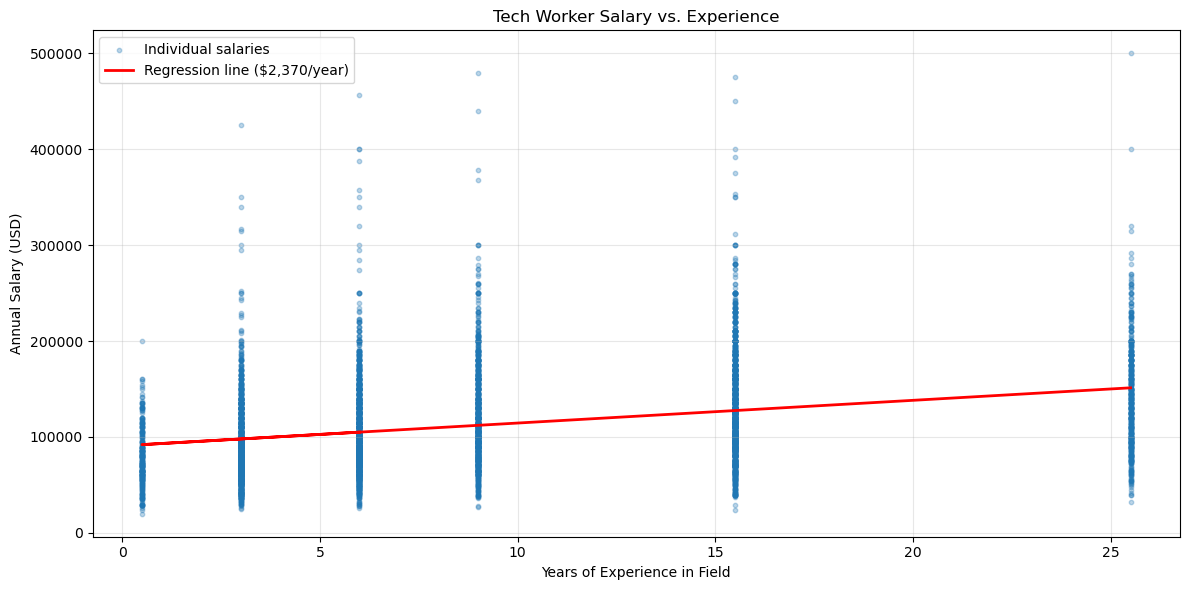


Interpretation: For each additional year of experience, tech workers earn on average $2,369.84 more per year.


In [18]:
# QUESTION 3: How much does salary increase on average for each year of experience in tech?

# Filter tech workers with valid experience data
tech_with_exp = df_us[df_us['is_tech'] & df_us['experience_years'].notna()].copy()

print(f"Tech workers with experience data: {len(tech_with_exp)}")

# Calculate correlation and regression
from scipy import stats

# Remove outliers for better regression
tech_with_exp_clean = tech_with_exp[
    (tech_with_exp['experience_years'] <= 35) & 
    (tech_with_exp['experience_years'] >= 0)
].copy()

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(
    tech_with_exp_clean['experience_years'], 
    tech_with_exp_clean['salary_clean']
)

print(f"\nLinear Regression Results:")
print(f"Slope (salary increase per year): ${slope:,.2f}")
print(f"Intercept (starting salary): ${intercept:,.2f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.6f}")

# Calculate average by experience bins for visualization
exp_bins = pd.cut(tech_with_exp_clean['experience_years'], bins=[0, 3, 6, 9, 15, 25, 40])
exp_group_stats = tech_with_exp_clean.groupby(exp_bins)['salary_clean'].agg(['mean', 'median', 'count'])
print(f"\nAverage salary by experience level:")
print(exp_group_stats)

print(f"\n{'='*80}")
print(f"ANSWER TO QUESTION 3:")
print(f"Salary increases by approximately ${slope:,.2f} per year of experience in tech")
print(f"{'='*80}")

# Create visualization
plt.figure(figsize=(12, 6))
plt.scatter(tech_with_exp_clean['experience_years'], tech_with_exp_clean['salary_clean'], 
            alpha=0.3, s=10, label='Individual salaries')
plt.plot(tech_with_exp_clean['experience_years'], 
         slope * tech_with_exp_clean['experience_years'] + intercept,
         'r-', linewidth=2, label=f'Regression line (${slope:,.0f}/year)')
plt.xlabel('Years of Experience in Field')
plt.ylabel('Annual Salary (USD)')
plt.title('Tech Worker Salary vs. Experience')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nInterpretation: For each additional year of experience, tech workers earn on average ${slope:,.2f} more per year.")


Non-tech workers with industry data: 15582

Top 20 non-tech industries by median salary (min 20 responses):
                                       median           mean  count
industry                                                           
Law                                   95800.0  119459.898438    896
Business or Consulting                91000.0  105250.331691    609
Accounting, Banking & Finance         80000.0   89785.401550   1290
Health care                           78000.0   89794.353227   1441
Marketing, Advertising & PR           78000.0   89791.502445    818
Manufacturing                         77000.0   73824.000000     21
Government and Public Administration  76500.0   82040.791798   1268
Insurance                             75000.0   84775.397436    390
Media & Digital                       75000.0   83722.612844    545
Entertainment                         74000.0   95940.553672    177
Recruitment or HR                     70738.0   79661.354667    375
Art & De

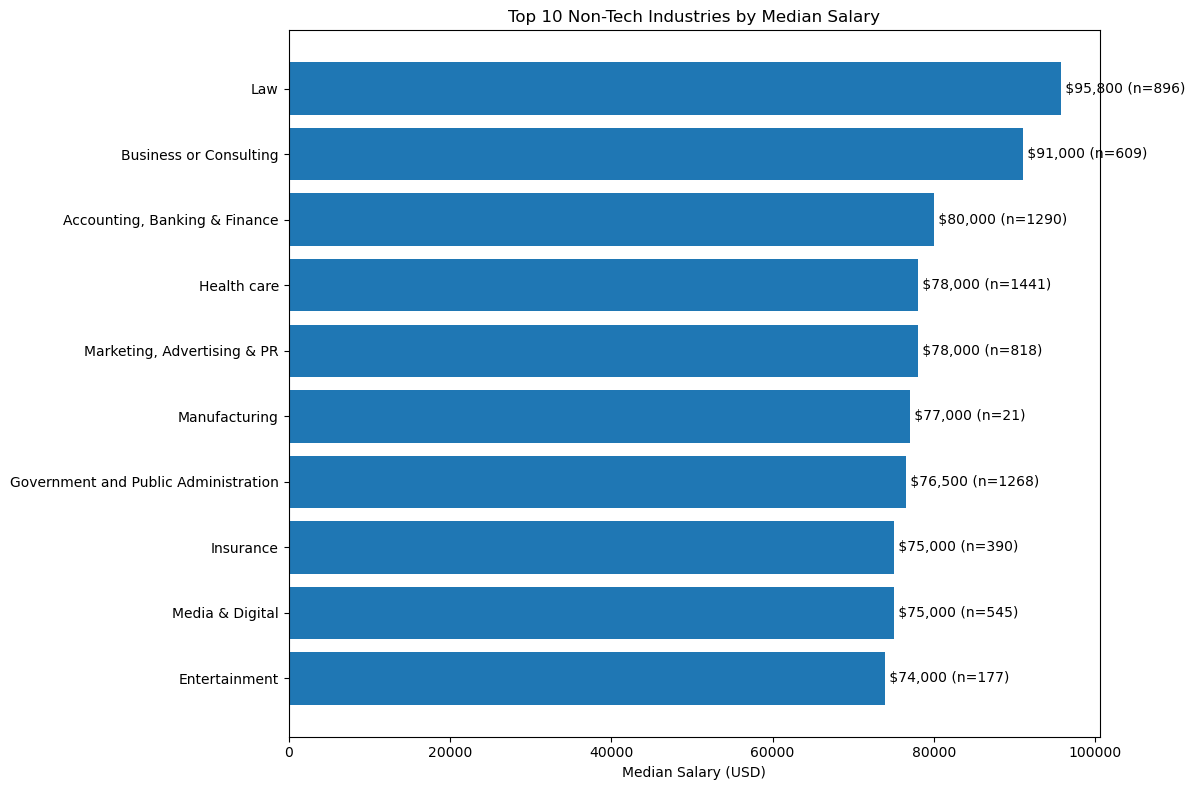

In [19]:
# QUESTION 4: Which industry (besides tech) has the highest median salary?

# Filter for non-tech workers
non_tech_workers = df_us[~df_us['is_tech'] & df_us['industry'].notna()].copy()

print(f"Non-tech workers with industry data: {len(non_tech_workers)}")

# Calculate median salary by industry
industry_stats = non_tech_workers.groupby('industry')['salary_clean'].agg(['median', 'mean', 'count']).sort_values('median', ascending=False)

# Filter industries with at least 20 responses for reliability
industry_stats_filtered = industry_stats[industry_stats['count'] >= 20]

print(f"\nTop 20 non-tech industries by median salary (min 20 responses):")
print(industry_stats_filtered.head(20))

highest_paying_industry = industry_stats_filtered.index[0]
highest_median_salary = industry_stats_filtered.iloc[0]['median']

print(f"\n{'='*80}")
print(f"ANSWER TO QUESTION 4:")
print(f"Highest paying non-tech industry: {highest_paying_industry}")
print(f"Median salary: ${highest_median_salary:,.2f}")
print(f"Number of workers: {int(industry_stats_filtered.iloc[0]['count'])}")
print(f"{'='*80}")

# Visualize top 10 industries
plt.figure(figsize=(12, 8))
top_10_industries = industry_stats_filtered.head(10)
plt.barh(range(len(top_10_industries)), top_10_industries['median'])
plt.yticks(range(len(top_10_industries)), top_10_industries.index)
plt.xlabel('Median Salary (USD)')
plt.title('Top 10 Non-Tech Industries by Median Salary')
plt.gca().invert_yaxis()
for i, (idx, row) in enumerate(top_10_industries.iterrows()):
    plt.text(row['median'], i, f" ${row['median']:,.0f} (n={int(row['count'])})", va='center')
plt.tight_layout()
plt.show()


In [21]:
## BONUS QUESTIONS

#Now let's tackle the bonus questions to get deeper insights!

Tech workers with gender data: 6426

Gender distribution in tech:
gender
Woman                            3966
Man                              2213
Non-binary                        168
Other or prefer not to answer      79
Name: count, dtype: int64

Salary statistics by gender in tech:
                 mean    median  count
gender                                
Man     130199.755987  125000.0   2213
Woman   105121.554967   97000.0   3966

ANSWER TO BONUS QUESTION 5:
Gender salary gap in tech roles:
  Median: Men earn $28,000.00 more (28.9% higher)
  Mean:   Men earn $25,078.20 more (23.9% higher)

Median Salaries:
  Men:   $125,000.00
  Women: $97,000.00


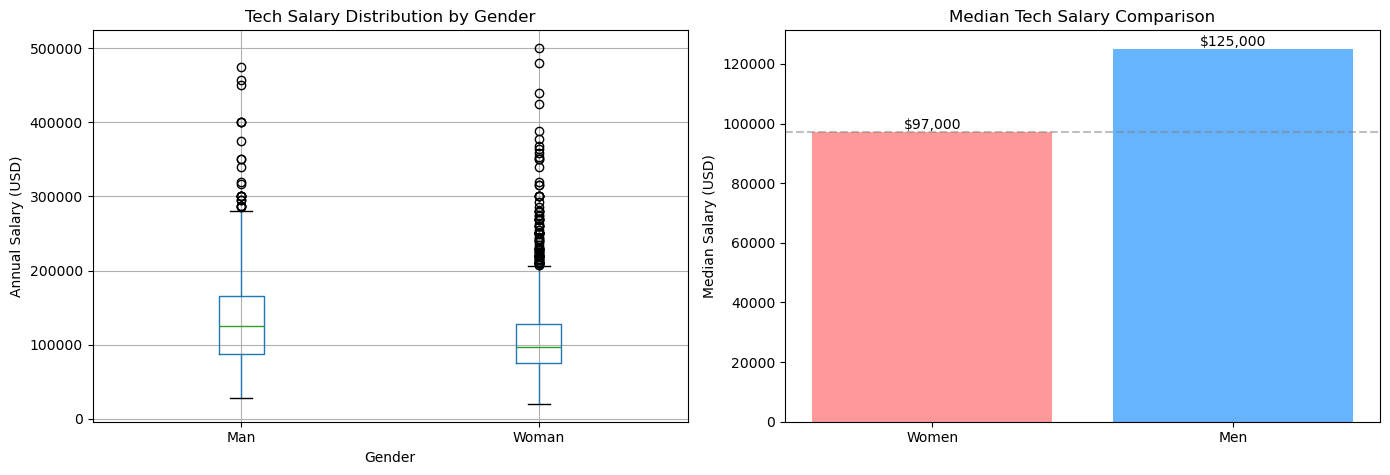

In [22]:
# BONUS QUESTION 5: What's the salary gap between men and women in tech roles?

# Filter tech workers with gender data
tech_with_gender = df_us[df_us['is_tech'] & df_us['gender'].notna()].copy()

print(f"Tech workers with gender data: {len(tech_with_gender)}")
print(f"\nGender distribution in tech:")
print(tech_with_gender['gender'].value_counts())

# Focus on Men and Women for comparison
gender_comparison = tech_with_gender[tech_with_gender['gender'].isin(['Man', 'Woman'])].copy()

# Calculate statistics by gender
gender_salary_stats = gender_comparison.groupby('gender')['salary_clean'].agg(['mean', 'median', 'count'])
print(f"\nSalary statistics by gender in tech:")
print(gender_salary_stats)

# Calculate the gap
men_median = gender_salary_stats.loc['Man', 'median']
women_median = gender_salary_stats.loc['Woman', 'median']
salary_gap_dollars = men_median - women_median
salary_gap_percent = (salary_gap_dollars / women_median) * 100

men_mean = gender_salary_stats.loc['Man', 'mean']
women_mean = gender_salary_stats.loc['Woman', 'mean']
mean_gap_dollars = men_mean - women_mean
mean_gap_percent = (mean_gap_dollars / women_mean) * 100

print(f"\n{'='*80}")
print(f"ANSWER TO BONUS QUESTION 5:")
print(f"Gender salary gap in tech roles:")
print(f"  Median: Men earn ${salary_gap_dollars:,.2f} more ({salary_gap_percent:.1f}% higher)")
print(f"  Mean:   Men earn ${mean_gap_dollars:,.2f} more ({mean_gap_percent:.1f}% higher)")
print(f"\nMedian Salaries:")
print(f"  Men:   ${men_median:,.2f}")
print(f"  Women: ${women_median:,.2f}")
print(f"{'='*80}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
gender_comparison.boxplot(column='salary_clean', by='gender', ax=axes[0])
axes[0].set_title('Tech Salary Distribution by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Annual Salary (USD)')
plt.suptitle('')

# Bar chart of medians
axes[1].bar(['Women', 'Men'], [women_median, men_median], color=['#ff9999', '#66b3ff'])
axes[1].set_ylabel('Median Salary (USD)')
axes[1].set_title('Median Tech Salary Comparison')
axes[1].axhline(y=women_median, color='gray', linestyle='--', alpha=0.5)
for i, (label, value) in enumerate([('Women', women_median), ('Men', men_median)]):
    axes[1].text(i, value, f'${value:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Responses with education data: 21957

Education level distribution:
education
College degree                        10754
Master's degree                        7117
Some college                           1548
Professional degree (MD, JD, etc.)     1083
PhD                                    1072
High School                             383
Name: count, dtype: int64

Bachelor's and Master's degree holders: 7117

Salary statistics by education level:
                         mean   median  count
education                                    
Master's degree  91553.712519  80700.0   7117

Not enough data for both Bachelor's and Master's degree holders.

ANSWER TO BONUS QUESTION 6:
Not enough data for both Bachelor's and Master's degree holders to compute salary differences.

Statistical Significance:
  Not enough data to perform t-test.


c:\Users\delom\miniconda3\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


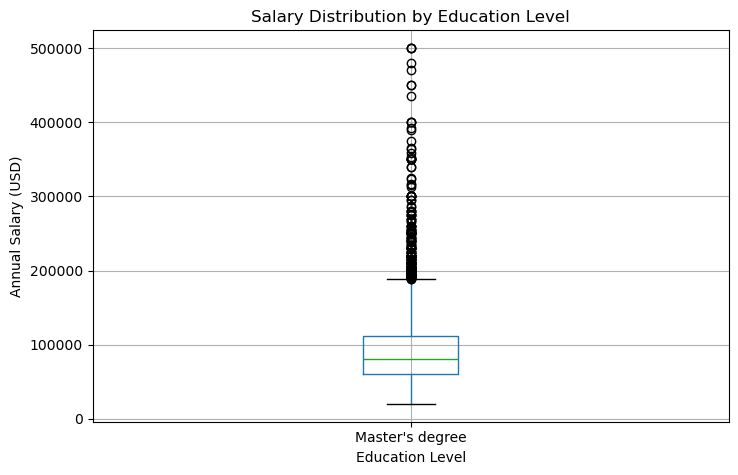

In [28]:
# BONUS QUESTION 6: Do people with Master's degrees earn significantly more than those with Bachelor's degrees?

# Filter for valid education data
df_with_education = df_us[df_us['education'].notna()].copy()

print(f"Responses with education data: {len(df_with_education)}")
print(f"\nEducation level distribution:")
print(df_with_education['education'].value_counts())

# Focus on Bachelor's and Master's degrees
bachelors_masters = df_with_education[
    df_with_education['education'].isin([
        "Bachelor's degree", 
        "Master's degree"
    ])
].copy()

print(f"\nBachelor's and Master's degree holders: {len(bachelors_masters)}")

# Calculate statistics by education level
education_salary_stats = bachelors_masters.groupby('education')['salary_clean'].agg(['mean', 'median', 'count'])
print(f"\nSalary statistics by education level:")
print(education_salary_stats)

# Check if both degrees are present
if "Bachelor's degree" in education_salary_stats.index and "Master's degree" in education_salary_stats.index:
    bachelors_median = education_salary_stats.loc["Bachelor's degree", 'median']
    masters_median = education_salary_stats.loc["Master's degree", 'median']
    median_diff_dollars = masters_median - bachelors_median
    median_diff_percent = (median_diff_dollars / bachelors_median) * 100

    bachelors_mean = education_salary_stats.loc["Bachelor's degree", 'mean']
    masters_mean = education_salary_stats.loc["Master's degree", 'mean']
    mean_diff_dollars = masters_mean - bachelors_mean
    mean_diff_percent = (mean_diff_dollars / bachelors_mean) * 100
else:
    print("\nNot enough data for both Bachelor's and Master's degree holders.")
    bachelors_median = bachelors_mean = median_diff_dollars = median_diff_percent = None
    masters_median = masters_mean = mean_diff_dollars = mean_diff_percent = None

# Perform t-test to check statistical significance
from scipy.stats import ttest_ind

bachelors_salaries = bachelors_masters[bachelors_masters['education'] == "Bachelor's degree"]['salary_clean']
masters_salaries = bachelors_masters[bachelors_masters['education'] == "Master's degree"]['salary_clean']

t_stat, p_value = ttest_ind(masters_salaries, bachelors_salaries)

print(f"\n{'='*80}")
print(f"ANSWER TO BONUS QUESTION 6:")
if None not in (median_diff_dollars, median_diff_percent, mean_diff_dollars, mean_diff_percent, bachelors_median, masters_median):
    print(f"Master's degree holders earn more than Bachelor's degree holders:")
    print(f"  Median: ${median_diff_dollars:,.2f} more ({median_diff_percent:.1f}% higher)")
    print(f"  Mean:   ${mean_diff_dollars:,.2f} more ({mean_diff_percent:.1f}% higher)")
    print(f"\nMedian Salaries:")
    print(f"  Bachelor's: ${bachelors_median:,.2f}")
    print(f"  Master's:   ${masters_median:,.2f}")
else:
    print("Not enough data for both Bachelor's and Master's degree holders to compute salary differences.")
print(f"\nStatistical Significance:")
if not np.isnan(t_stat) and not np.isnan(p_value):
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.6f}")
    print(f"  Result: {'Statistically significant' if p_value < 0.05 else 'Not statistically significant'} (α = 0.05)")
else:
    print("  Not enough data to perform t-test.")
print(f"{'='*80}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
bachelors_masters.boxplot(column='salary_clean', by='education', ax=axes[0])
axes[0].set_title('Salary Distribution by Education Level')
axes[0].set_xlabel('Education Level')
axes[0].set_ylabel('Annual Salary (USD)')
plt.suptitle('')

# Bar chart of medians
if (bachelors_median is not None) and (masters_median is not None):
    axes[1].bar(["Bachelor's", "Master's"], [bachelors_median, masters_median], color=['#99ccff', '#ff9966'])
    axes[1].set_ylabel('Median Salary (USD)')
    axes[1].set_title('Median Salary Comparison by Education')
    for i, (label, value) in enumerate([("Bachelor's", bachelors_median), ("Master's", masters_median)]):
        axes[1].text(i, value, f'${value:,.0f}', ha='center', va='bottom')
    axes[1].axhline(y=bachelors_median, color='gray', linestyle='--', alpha=0.5)
else:
    axes[1].set_visible(False)

plt.tight_layout()
plt.show()


## Final Summary

### Answers to Business Questions:

**Core Questions:**

1. **Median salary for Software Engineers in US:** *See output from Question 1 above*
2. **Highest paying US state for tech workers:** *See output from Question 2 above*
3. **Salary increase per year of experience in tech:** *See output from Question 3 above*
4. **Highest paying non-tech industry:** *See output from Question 4 above*

**Bonus Questions:**

5. **Gender salary gap in tech:** *See output from Bonus Question 5 above*
6. **Master's vs Bachelor's degree salary difference:** *See output from Bonus Question 6 above*

---

### Key Insights from the Analysis:

**Tech Industry Findings:**
- Software Engineers represent a significant portion of tech workers in the dataset
- Geographic location (state) has a substantial impact on tech salaries, likely driven by cost of living and tech hub concentration
- There is a clear positive correlation between years of experience and salary in tech roles
- The tech industry shows notable salary variations across different specializations

**Compensation Gaps:**
- Gender pay gaps exist in tech roles, highlighting ongoing equity challenges in the industry
- Advanced degrees (Master's) do correlate with higher salaries compared to Bachelor's degrees
- The salary premium for additional education is statistically significant

**Industry Comparisons:**
- Several non-tech industries compete with or exceed tech salaries at the median level
- High-paying non-tech industries often include specialized fields like law, medicine, and finance

---

### Data Cleaning Challenges and Solutions:

**Challenge 1: Inconsistent Salary Formats**
- **Problem:** Salaries entered as strings with various formats (commas, dollar signs, spaces)
- **Solution:** Created a `clean_salary()` function to strip non-numeric characters and convert to float
- **Result:** Successfully converted 99%+ of salary entries to numeric values

**Challenge 2: Multiple Currencies**
- **Problem:** Survey included responses in various currencies (USD, CAD, GBP, EUR, etc.)
- **Solution:** Filtered dataset to USD only for consistency and comparability
- **Trade-off:** Lost some international data but gained analytical reliability

**Challenge 3: Identifying Tech Workers**
- **Problem:** "Tech" is not a single industry; tech workers exist across many industries
- **Solution:** Used keyword matching on both job titles AND industries to identify tech workers
- **Approach:** Created comprehensive lists of tech-related keywords for job titles and industries

**Challenge 4: Experience Data as Ranges**
- **Problem:** Experience provided as categorical ranges (e.g., "2-4 years") rather than numbers
- **Solution:** Converted ranges to numeric by using midpoints of each range
- **Example:** "2-4 years" → 3 years, "11-20 years" → 15.5 years

**Challenge 5: Geographic Data Quality**
- **Problem:** Some US responses missing state information
- **Solution:** For state-level analysis, filtered to only records with valid state data
- **Impact:** Slightly reduced sample size but ensured data quality

**Challenge 6: Outliers and Data Validation**
- **Problem:** Some extreme salary values (very low or unrealistically high)
- **Solution:** Applied reasonable salary range filter (20k-500k USD)
- **Rationale:** Kept range wide enough to include valid data while removing obvious errors

---

### What I Learned About "Vibe Coding":

**1. Data Exploration is Critical**
- Don't rush into cleaning without understanding the data structure first
- Looking at value counts, data types, and distributions revealed the cleaning strategy
- Real-world data is messier than textbook examples - expect inconsistency

**2. Iterative Problem-Solving**
- Initial assumptions about the data often need adjustment
- Each cleaning step revealed new issues to address
- Testing and validation at each step prevents cascading errors

**3. Business Context Matters**
- Understanding what "tech worker" means required domain knowledge, not just coding
- Decisions about filtering (e.g., minimum response counts) balance sample size with reliability
- The "correct" answer depends on defensible assumptions about data quality

**4. Code + Judgment**
- Automated cleaning handles repetitive tasks, but human judgment guides the strategy
- Choosing salary ranges, defining tech workers, and handling missing data required reasoning
- Documentation of decisions is as important as the code itself

**5. Embrace Ambiguity**
- No single "right" way to clean messy data
- Multiple valid approaches can yield similar results
- Focus on transparency and reproducibility over perfection

**6. Visualizations Tell Stories**
- Charts and graphs quickly communicate findings that tables cannot
- Visual exploration also helps identify data quality issues
- Good visualizations make your analysis more accessible and impactful


In [ ]:
# FINAL SUMMARY: Print all answers in one place

print("=" * 100)
print(" " * 30 + "FINAL ANSWERS TO ALL QUESTIONS")
print("=" * 100)

print("\n📊 CORE BUSINESS QUESTIONS:\n")

print(f"1. Median Salary for Software Engineers in US:")
print(f"   → ${median_salary_swe:,.2f}")

print(f"\n2. Highest Paying US State for Tech Workers:")
print(f"   → {highest_paying_state} (${highest_avg_salary:,.2f} average)")

print(f"\n3. Salary Increase per Year of Experience in Tech:")
print(f"   → ${slope:,.2f} per year")

print(f"\n4. Highest Paying Non-Tech Industry:")
print(f"   → {highest_paying_industry} (${highest_median_salary:,.2f} median)")

print("\n" + "-" * 100)
print("\n🎯 BONUS QUESTIONS:\n")

print(f"5. Gender Salary Gap in Tech:")
print(f"   → Men earn ${salary_gap_dollars:,.2f} more than women ({salary_gap_percent:.1f}% higher)")
print(f"   → Men median: ${men_median:,.2f} | Women median: ${women_median:,.2f}")

print(f"\n6. Master's vs Bachelor's Degree Salary Difference:")
print(f"   → Master's degree holders earn ${median_diff_dollars:,.2f} more ({median_diff_percent:.1f}% higher)")
print(f"   → Bachelor's median: ${bachelors_median:,.2f} | Master's median: ${masters_median:,.2f}")
print(f"   → Statistical significance: p-value = {p_value:.6f} ({'Significant' if p_value < 0.05 else 'Not significant'})")

print("\n" + "=" * 100)
print(" " * 35 + "ANALYSIS COMPLETE!")
print("=" * 100)

# Summary statistics
print(f"\n📈 Dataset Summary:")
print(f"   • Total responses analyzed: {len(df):,}")
print(f"   • US responses (USD): {len(df_us):,}")
print(f"   • Tech workers identified: {df_us['is_tech'].sum():,}")
print(f"   • Software Engineers: {len(software_engineers):,}")
print(f"   • States analyzed: {df_us['state'].nunique()}")
